# LWFA Simulation

Simulation parameters

In [1]:
import em1d
import numpy as np

# Time step
dt = 0.019
tmax = 22.8

# Simulation box
nx  = 1000
box = 20.0

# Diagnostic frequency
ndump = 50

# Background plasma

ppc = 128 # Particles per cell

electrons = em1d.Species( "electrons", -1.0, ppc, density = em1d.Density( type = em1d.DensityType.step, start = 20.0))

# Diagnostics
def rep( sim ):
    if ( sim.n % ndump == 0 ):
        
        # All electric field components
        sim.emf.report( em1d.EMF.efld, 0 )
        sim.emf.report( em1d.EMF.efld, 1 )
        sim.emf.report( em1d.EMF.efld, 2 )
        
        # Charge density
        electrons.report( em1d.SpeciesDiag.charge )
        
        # x1u1 phasespace
        electrons.report( em1d.phasespace( em1d.SpeciesDiag.x1, em1d.SpeciesDiag.u1),
                          pha_nx = [1024,512], pha_range = [[0.0,20.0],[-2.0,2.0]])

# Initialize simulation data
sim = em1d.Simulation( nx, box, dt, electrons, report = rep )

# Add laser pulse
sim.add_laser( em1d.Laser( start = 17.0, fwhm = 2.0, a0 = 2.0, omega0 = 10.0, polarization = np.pi/2 ))

# Set moving window
sim.set_moving_window()

# Set current smoothing
sim.set_smooth( em1d.Smooth(xtype = em1d.Smooth.compensated, xlevel = 4) )

# Run the simulation
sim.run( tmax )


Running simulation up to t = 22.8 ...
n = 1201, t = 22.819
Done.


### Accelerating Gradient

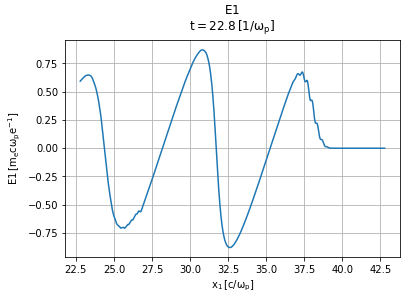

In [2]:
import zdf
import matplotlib.pyplot as plt
import numpy as np

(data,info) = zdf.read("EMF/E1-001200.zdf")

dx = (info.grid.axis[0].max - info.grid.axis[0].min ) / info.grid.nx[0]
xmin = info.grid.axis[0].min + dx/2
xmax = info.grid.axis[0].max - dx/2

plt.plot(np.linspace(xmin, xmax, num = info.grid.nx[0]), data )

xlabel = "{:s}\,[{:s}]".format(info.grid.axis[0].label,info.grid.axis[0].units)
ylabel = "{:s}\,[{:s}]".format(info.grid.label, info.grid.units)

title = info.grid.label
timeLabel = "t = {:g}\,[{:s}]".format(info.iteration.t,info.iteration.tunits)

plt.title(r'$\sf{' + title + r'}$' + '\n' + r'$\sf{'+ timeLabel+ r'}$')
plt.xlabel(r'$\sf{' +xlabel+ r'}$')
plt.ylabel(r'$\sf{' +ylabel+ r'}$')

plt.grid(True)
plt.show()

### Electron phasespace density

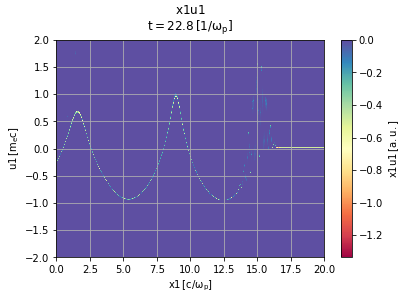

In [3]:
import matplotlib.pyplot as plt
import numpy as np

(data,info) = zdf.read("electrons/x1u1-001200.zdf")

plt.imshow( data, cmap = plt.cm.Spectral, interpolation = 'nearest', origin = 'lower',
          extent = ( info.grid.axis[0].min, info.grid.axis[0].max,
                     info.grid.axis[1].min, info.grid.axis[1].max),
          aspect = 'auto')

zlabel = "{:s}\,[{:s}]".format(info.grid.label,info.grid.units)
plt.colorbar().set_label(r'$\sf{' +zlabel+ r'}$')

title = info.grid.label
timeLabel = "t = {:g}\,[{:s}]".format(info.iteration.t,info.iteration.tunits)

plt.title(r'$\sf{' + title + r'}$' + '\n' + r'$\sf{'+ timeLabel+ r'}$')

xlabel = "{:s}\,[{:s}]".format(info.grid.axis[0].label,info.grid.axis[0].units)
ylabel = "{:s}\,[{:s}]".format(info.grid.axis[1].label,info.grid.axis[1].units)

plt.xlabel(r'$\sf{' +xlabel+ r'}$')
plt.ylabel(r'$\sf{' +ylabel+ r'}$')

plt.grid(True)

plt.show()